## Visual analytics

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [11]:
df = pd.read_csv("googleplaystore.csv")

#### Pre Processing

In [12]:
df = df[df['Size'] != 'Varies with device']
df = df.dropna(subset=['Rating'])
def size_to_mb(x):
    if 'M' in x:
        return float(x.replace('M',''))
    elif 'k' in x:
        return float(x.replace('k','')) / 1024

df['Size'] = df['Size'].apply(lambda x: size_to_mb(str(x)))

free_df = df[df['Type'] != 'Pain']
free_df["Reviews"] = pd.to_numeric(free_df["Reviews"], errors="coerce")
free_df["Installs"] = (
    free_df["Installs"].astype(str)
    .str.replace("+", "", regex=False)
    .str.replace(",", "", regex=False)
)
free_df["Installs"] = pd.to_numeric(free_df["Installs"], errors="coerce")
free_df = free_df.dropna(subset=['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'])
free_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.000000,10000.0,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.000000,500000.0,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.700000,5000000.0,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.000000,50000000.0,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.800000,100000.0,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,0.604492,1000.0,Free,0,Everyone,Books & Reference,23-Mar-14,0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7.0,2.600000,500.0,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.000000,5000.0,Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.600000,100.0,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up


- می‌خوای ببینی کاربران معمولاً چه امتیازی میدن

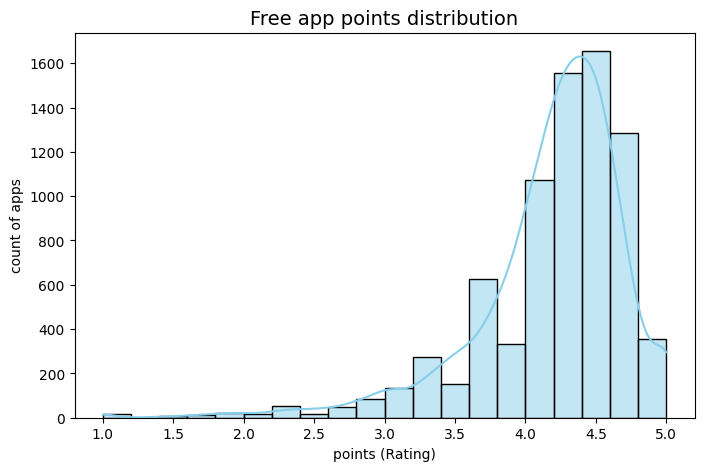

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(free_df['Rating'], bins=20, kde=True, color='skyblue')
plt.title("Free app points distribution", fontsize=14)
plt.xlabel("points (Rating)")
plt.ylabel("count of apps")
plt.show()

- کدوم ویژگی‌ها با امتیاز رابطه دارن
- Which features are related to the score?
- Is the number of reviews or installs most related to the rating?

The image below shows a feature correlation heat map that measures the relationships between four different features (variables). This type of chart is essential for understanding how each variable is related to the others.
Correlation Chart Analysis
Correlation is measured with values ​​between -1.00 and +1.00:
* +1.00 (dark red): Perfect positive correlation (as one increases, the other also increases).
* -1.00 (usually dark blue in two-way charts): Perfect negative correlation (as one increases, the other decreases).
* 0.00 (usually white or neutral color): No correlation (no linear relationship).
The features examined in this chart are: Reviews, Installs, Size, and Rating.
#### Key Correlation Results
##### 1. Strong Correlation
* Reviews and Installs (inversely):
* Correlation: 0.63
* This is a strong positive correlation. This means that apps with more installs are more likely to have received more reviews (which makes sense).
##### 2. Moderate to Weak Correlation
* Reviews and Size:
* Correlation: 0.24
* This is a weak positive correlation. An increase in the number of reviews is slightly correlated with an increase in the size of the app, but the relationship is not very strong.
* Installs and Size:
* Correlation: 0.16
* This is a very weak correlation. The size of the app has almost no linear relationship with the number of installs.
##### 3. No correlation with Rating
* Rating and other features:
* Rating and Reviews: 0.08
* Rating and Installs: 0.05
* Rating and Size: 0.08
* All correlations between rating and other features are very close to zero.
##### Conclusion: This data shows that the number of installs, number of reviews, or size of the app have almost no linear relationship with the average user rating of the app.
##### Overall Conclusion: The strongest relationship in the data is between the number of reviews and the number of installs.

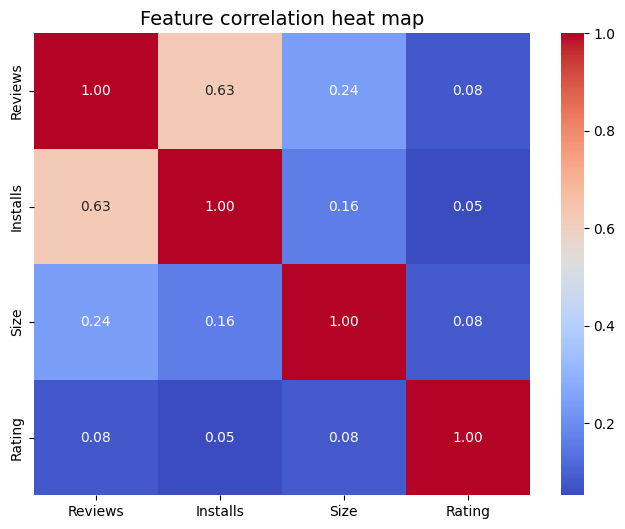

In [22]:
numeric_cols = ['Reviews', 'Installs', 'Size', 'Rating']
plt.figure(figsize=(8,6))
sns.heatmap(free_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature correlation heat map", fontsize=14)
plt.show()

- ارتباط بین تعداد Review و امتیاز

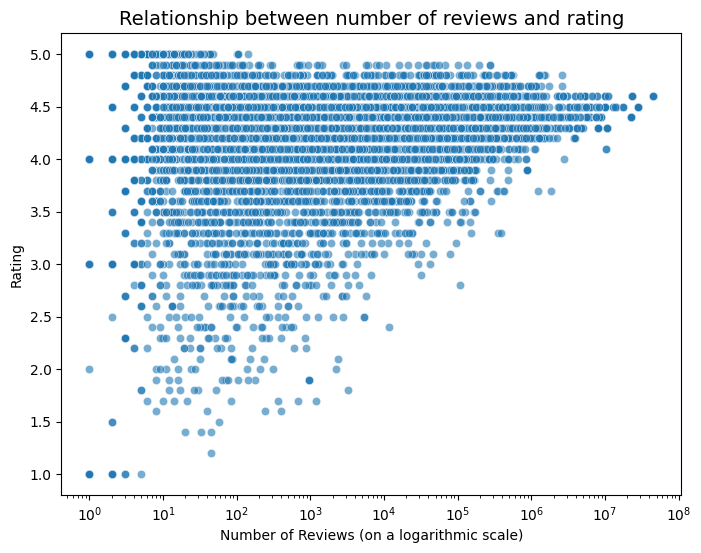

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Reviews', y='Rating', data=free_df, alpha=0.6)
plt.xscale('log')
plt.title("Relationship between number of reviews and rating", fontsize=14)
plt.xlabel("Number of Reviews (on a logarithmic scale)")
plt.ylabel("Rating")
plt.show()

- 🎯کدوم دسته‌ها بیشترین نصب رو جذب کردن؟
- 🎯Which categories attracted the most installs?

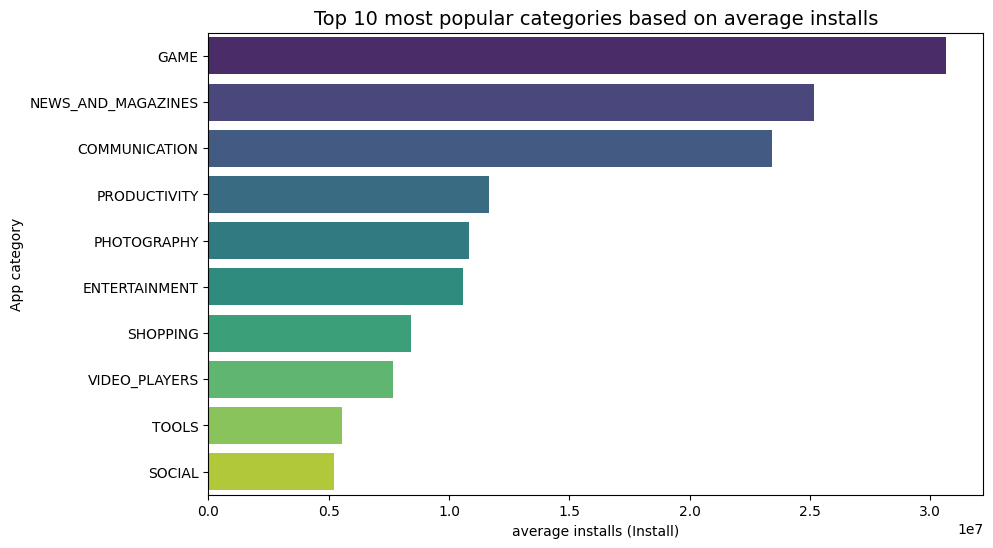

In [29]:
top_installs = free_df.groupby('Category')['Installs'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_installs.values, y=top_installs.index, hue=top_installs.index, palette="viridis", dodge=False)
plt.title("Top 10 most popular categories based on average installs", fontsize=14)
plt.xlabel("average installs (Install)")
plt.ylabel("App category")
plt.show()

- ##### Which apps with the lowest volume had the most success?

🔢 Analysis logic:
Low volume (e.g. Size in the bottom 25% of data)

High rating (Rating ≥ 4.5)

High installs (Installs in the top 25% of data)

In [41]:
size_q1 = free_df['Size'].quantile(0.25)
inst_q3 = free_df['Installs'].quantile(0.75)

successful_light = free_df[
    (free_df['Size'] <= size_q1) &
    (free_df['Installs'] >= inst_q3) &
    (free_df['Rating'] >= 4.5)
]

print("تعداد اپ‌های موفق سبک:", len(successful_light))
successful_light[['App', 'Category', 'Size',
                  'Installs','Genres', 'Rating' ,
                  'Reviews','Type','Android Ver',
                  'Last Updated']].head(20)

تعداد اپ‌های موفق سبک: 83


,App,Category,Size,Installs,Genres,Rating,Reviews,Type,Android Ver,Last Updated
151,Free Books - Spirit Fanfiction and Stories,BOOKS_AND_REFERENCE,5.0,1000000.0,Books & Reference,4.8,116507.0,Free,4.0.3 and up,1-Aug-18
206,Call Blocker,BUSINESS,3.2,5000000.0,Business,4.6,188841.0,Free,4.0 and up,21-Jun-18
703,Learn English with Wlingua,EDUCATION,3.3,10000000.0,Education,4.7,314299.0,Free,4.0 and up,2-May-18
706,Learn Spanish - Español,EDUCATION,3.2,1000000.0,Education,4.7,32346.0,Free,4.0 and up,18-Dec-17
758,Learn C++,EDUCATION,5.3,1000000.0,Education,4.6,73404.0,Free,4.0 and up,25-Dec-17
764,Learn SQL,EDUCATION,5.3,1000000.0,Education,4.7,19277.0,Free,4.0 and up,25-Dec-17
807,Learn English with Wlingua,EDUCATION,3.3,10000000.0,Education,4.7,314300.0,Free,4.0 and up,2-May-18
863,Motorola Spotlight Player™,ENTERTAINMENT,3.3,10000000.0,Entertainment,4.6,22508.0,Free,4.2 and up,16-Jul-15
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.0,1000000.0,Entertainment,4.7,11661.0,Free,4.0.3 and up,14-Jul-18
1110,Branch,FINANCE,3.8,1000000.0,Finance,4.6,69973.0,Free,4.0 and up,23-Jul-18


- پیدا کردن اپ‌هایی که کاربرها عاشقشون بودن ولی هنوز معروف نشدن.
- ##### Finding apps that users love but haven't yet become popular.

In [43]:
inst_q1 = free_df['Installs'].quantile(0.25)

underrated = free_df[
    (free_df['Installs'] <= inst_q1) &
    (free_df['Rating'] >= 4.7)
][['App', 'Category', 'Installs', 'Rating']].sort_values('Rating', ascending=False)

underrated.head(20)

,App,Category,Installs,Rating
615,Awake Dating,DATING,100.0,5.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,100.0,5.0
10820,Fr. Daoud Lamei,FAMILY,1000.0,5.0
612,American Girls Mobile Numbers,DATING,1000.0,5.0
10776,Monster Ride Pro,GAME,10.0,5.0
10742,GKPB FP Online Church,LIFESTYLE,1000.0,5.0
10721,Mad Dash Fo' Cash,GAME,100.0,5.0
10697,Mu.F.O.,GAME,1.0,5.0
10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,1000.0,5.0
654,Speeding Joyride & Car Meet App,DATING,100.0,5.0


 - کشف اپ‌هایی که زیاد نصب شدن اما کاربران ناراضی بودن.
 - ##### Discover apps that were widely installed but had dissatisfied users.

In [44]:
inst_q3 = free_df['Installs'].quantile(0.75)

overrated = free_df[
    (free_df['Installs'] >= inst_q3) &
    (free_df['Rating'] <= 3.5)
][['App', 'Category', 'Installs', 'Rating']].sort_values('Rating')

overrated.head(20)

,App,Category,Installs,Rating
5048,AppFinder by AppTap,TOOLS,5000000.0,2.0
4828,Moto Z Market,TOOLS,1000000.0,2.2
8131,CZ File Manager,TOOLS,1000000.0,2.2
5604,PS4 Second Screen,FAMILY,1000000.0,2.4
6765,BT Notifier,TOOLS,1000000.0,2.5
4226,How Old am I?,FAMILY,1000000.0,2.8
5233,Club Penguin Island,FAMILY,1000000.0,2.8
5443,3D Holograms Joke,FAMILY,5000000.0,2.9
4599,DIRECTV Remote App,FAMILY,1000000.0,3.0
6408,Lezhin Comics - Daily Releases,COMICS,1000000.0,3.0
